<a href="https://colab.research.google.com/github/joseortegalabra/MLBI/blob/master/Tarea2_MLBI_Jos%C3%A9_Ignacio_Ortega_Labra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2: Machine Learning for Business Intelligence

## Instrucciones

1. Esta tarea es de caracter individual, por lo tanto queda estrictamente prohibida la copia de codigo ajeno.

2. En caso de elaborar su respuesta **basandose** en código ajeno encontrado en la web, debe agradecer al menos citando la referencia.

3. La discusión con compañeros es siempre bienvenida, no obstante cada respuesta debe ser redactada de manera individual.

4. La fecha límite para la entrega de esta tarea queda establecida para el 15/06/2020.

Nota: La resolución de algunos de los ejercicios puede tomar bastante tiempo, así como su ejecución. Por lo tanto se recomienda hacer la tarea con anticipación y evitar riesgos.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as kr
from sklearn.metrics import accuracy_score
import math
import tensorflow as tf

In [0]:
#funciones auxiliares usadas para graficar
def visualize_train_valid_test(x_train, x_valid, x_test, y_train, y_valid, y_test):
  fig, axs = plt.subplots(3, 1, figsize = ((7,20)) )
  #plot train
  axs[0].scatter(x_train[:, 0], x_train[:, 1], c = y_train, alpha = 0.5, marker = 'x')
  axs[0].set_title('Data Train', fontsize = 25)
  axs[0].set_yticklabels([])
  axs[0].set_xticklabels([])

  #plot valid
  axs[1].scatter(x_valid[:, 0], x_valid[:, 1], c = y_valid, alpha = 0.5, marker = 'x')
  axs[1].set_title('Data Valid', fontsize = 25)
  axs[1].set_yticklabels([])
  axs[1].set_xticklabels([])

  #plot test
  axs[2].scatter(x_test[:, 0], x_test[:, 1], c = y_test, alpha = 0.5, marker = 'x')
  axs[2].set_title('Data Test', fontsize = 25)
  axs[2].set_yticklabels([])
  axs[2].set_xticklabels([])

def visualize_results(train_loss, val_loss, train_acc, val_acc):
  fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = ((14, 7)))
  ax = axs[0]
  ax.set_title('Loss', fontsize = 25)
  ax.grid(color = 'black', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
  ax.plot(train_loss, label = 'loss_train', color = 'black', linestyle = '-')
  ax.plot(val_loss, label = 'loss_valid', color = 'orange')
  ax.set_xlabel('Epochs', fontsize = 13)
  ax.legend()

  ax = axs[1]
  ax.set_title('Accuracy', fontsize = 25)
  ax.grid(color = 'black', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
  ax.plot(train_acc, label = 'acc_train', color = 'black', linestyle = '-')
  ax.plot(val_acc, label = 'acc_valid', color = 'orange')
  ax.set_xlabel('Epochs', fontsize = 13)
  plt.legend()

## Pregunta 1: Construyendo una red neuronal desde cero

Para este ejercicio construiremos una red neuronal simple desde cero, la entrenaremos y veremos sus resultados. Para esto utilizaremos un dataset de juguete construido a partir de datos que provienen de dos Gaussianas multivariadas. El objetivo es generar un modelo capaz de clasificar entre estas dos Gaussianas.

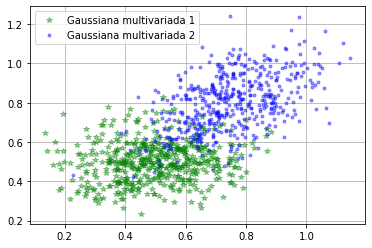

In [3]:
#Create Distribution Multivariant
mean1 = [0.5, 0.5]
cov1 = [[0.02, 0], [0, 0.01]]
x1 = np.random.multivariate_normal(mean1, cov1, 500)    #two features in x1
y1 = np.zeros((500,1), dtype='uint')    #one output y1  all ZEROS

mean2 = [0.75, 0.8]
cov2 = [[0.02, 0.01], [0.01, 0.02]]
x2 = np.random.multivariate_normal(mean2, cov2, 500)   ##two features in x2
y2 = np.ones((500,1), dtype='uint')   #one output y2 all ONES

x, y = np.concatenate((x1, x2), axis=0), np.concatenate((y1, y2), axis=0)

plt.plot(x1[:,0], x1[:,1], '*', label='Gaussiana multivariada 1', c='g', alpha=0.4)
plt.plot(x2[:,0], x2[:,1], '.', label='Gaussiana multivariada 2', c='b', alpha=0.4)
plt.legend()
plt.grid(True)
plt.show()

1.1 En este paso construiremos la red neuronal perceptron multicapa que utilizaremos para clasificar los datos provenientes de las dos Gaussianas multivariadas. Para esto utilizaremos las siguientes especificaciones:
1. Una capa oculta de 8 neuronas y una capa de salida de 1 neurona.
2. Función de activación sigmoide.
3. Función de divergencia de entropía cruzada binaria.


**Hint:**
Existen muchas formas de construir esta red y calcular sus parámetros, pero por simplicidad se sugiere un esquema como el que sigue (puede servir de guía, pero puede programar la red como estime conveniente):

```
class PerceptronMulticapa:
    '''
    primero definir una clase para la red neuronal, la cual recibe como parámetrs las dimensiones de entrada, 
    oculta y salida, asi como el learning rate necesario para la actualización de los parámetros.
    '''
    def __init__(self, inp_dim, hidden_dim, out_dim, lr):
        #definición de los parámetros de la red.
        # W1 = aleatorio
        # W2 = aleatorio
     
    def forward(self, x, y):
        '''
        Acá se calcula el valor predicho por la red, así como los valores intermedios de la capa oculta.
        Se deben tener en cuenta las funciones de activación y de costo. Estas y sus derivadas pueden 
        programarse como funciones aparte.
        '''
        # X^1 = f(W^1X^0)
        # X^2 = f(W^2X^1)
        # Loss(y,X^2)


    def backward(self, x, y):
        '''
        Acá se calculan los nuevos parámetros de la red utilizando el método de backpropagation 
        y gradient descent.
        '''
        # dW2 = Loss' * f(W^2X^1)' * (W^2X^1)'
        # dW1 = ...


        # W2 -= learnng_rate * dW2 
        # W1 -= learnng_rate * dW1
```

(10 pts.)

In [0]:
#CONJUNTO DE FUNCIONES DE ACTIVACIÓN CON SU DERIVADA
#FUNCION SIGMOIDE
'''
def sigmoid(x):
    "Numerically stable sigmoid function."
    if x >= 0:
        z = exp(-x)
        return 1 / (1 + z)
    else:
        # if x is less than zero then z will be small, denom can't be
        # zero because it's 1+z.
        z = exp(x)
        return z / (1 + z)
'''
#funcion sigmoide
from scipy.special import expit

#derivada sigmoide
def d_sigmoid(z, y):
  derivate = np.zeros((z.shape[0], z.shape[1], z.shape[1])) #tengo una tercera dimension al inicio para guardar el jacobiano de cada uno de los z de cada dato
  for i in range(z.shape[0]): #recorro datos
    for j in range(z.shape[1]): #recorro neurona
      for k in range(z.shape[1]): 
        if(j == k):  #jacobiano de una funcion scalar es una matriz diagonal
          derivate[i][j][k] = expit(z[i][j]) * (1 - expit(z[i][j]))   
        else:
          derivate[i][j][k] = 0 #funcion de activacion escalar   
  return derivate

In [0]:
#CONJUNTO DE LOSS CON SU DERIVADA
#### LOSS Binary crossentropy
def loss_binary_crossentropy(y_real, y_predicho):
  loss = []
  for i in range(y_real.shape[1]):
    if(y_real[0][i] == 1):
      loss.append(- np.log(y_predicho[0][i]))
    else:  #y real es igual a cero
      loss.append(- np.log(1.0 - y_predicho[0][i]))
  loss = np.array(loss)
  return loss.mean()

#derivada binary crossentropy
def derv_loss_binary_crossentropy(y_pred, y_real):   #entrada tengo el orden (N°neuronas ultima capa, N°Datos)  (1, N datos)
#CAMBIO EL ORDEN PARA QUE QUEDE EN MATRIZ(N°DATOS, N°NEURRONAS DE ULTIMA CAPA) para poder hacer la retroprogación del error
  y_pred = y_pred.T
  y_real = y_real.T
  derv = np.zeros((y_pred.shape[0], 1))
  for i in range(y_pred.shape[0]):
    if(y_real[i] == 1):
      derv[i] = -1/y_pred[i]
    else:
      derv[i] = 1/(1 - y_pred[i])
  return derv

In [0]:
#funciones intermedias para realizar la red neuronal
#SUFFLE DE LOS DATOS DE ENTRENAMIENTO
def suffle_data(x, y):   
  #x e y tiene que estar en formato de matrices de train_test_split (dato, feature), (dato, salida)
  #RETURN PARA RED NEURONAL (FEATURE, DATO)  ,  (SALIDA, DATO)
  data = np.hstack(( x, y ))
  data_index = np.hstack(( np.array(    [[i] for i in range(x.shape[0])]   ) , data ))
  np.random.shuffle(data_index)
  x_shuffle = data_index[:, 1: data_index.shape[1]-y.shape[1] ].T
  y_shuffle = data_index[:, 1+x.shape[1]:].T
  return x_shuffle, y_shuffle

#OBTENER BATCH DE LOS DATOS DE ENTRENAMIENTO
def get_batch(x, y, size_batch, i):   #entrada y salida en formato (feature, data)
  return x[: , i*size_batch : i*size_batch+size_batch ], y[: , i*size_batch : i*size_batch+size_batch ]

#OBTENER LA PREDICCIÓN DESDE LAS PROBABILIDADES
def get_pred(y_horizontal_2d):  
  y_horizontal = y_horizontal_2d.reshape(y_horizontal_2d.shape[1]).copy()
  for i in range(y_horizontal.shape[0]):
    if(y_horizontal[i] >= 0.5):
      y_horizontal[i] = 1
    else:
      y_horizontal[i] = 0
  return y_horizontal

#CALCULAR GRADIENTE DE Z (DERIVADA DIVERGENCIA POR MATRIZ JACOBIANA DE LA FUNCION DE ACTIVACIÓN CON RESPECTO A Z)
def calculate_grad_Z(grad_y, d_f_act, z, y):
  #para evaluar el jacobiano en cada punto de Z, Z tiene que estar en el formato traspuesto ocupado en back (100X1) 100 datos x 1 neurona
  z = z.T
  y = y.T
  jacobian = d_f_act(z, y)  #jacobiano que obtengo es una matriz (data, (numero neuronas, numero neuronas))   #matriz de 3 dimensiones (datos, 4x4) 4 neuronas  
  grad_Z = []
  for i in range(grad_y.shape[0]):
    grad_Z.append(grad_y[i] @ jacobian[i])
  grad_Z = np.array(grad_Z).reshape(grad_y.shape[0], grad_y.shape[1])  #devuelve gradiente de z de igual tamaño al gradiente de y
  return grad_Z

#### MODELO FULLY CONNECTED
###### Se pueden crear N layers fully connected, de cualquier tipo, solo se necesita definir una función para las funciones de activación y losses con sus respectivas derivadas en formato matricial.

In [0]:
class model_nn():
  def __init__(self):
    #inicializar lista donde se guardaran los z, y, w, funciones de costos que utiliza el algoritmo para optimizar
    self.Z = [None]
    self.Y = [] #el y sub cero tiene un valor
    self.W = [] #dejo vacia la lista porque al crear los primeros W ahi voy a agregar el None en la primera capa
    self.b = []
    self.f_act = [None]
    self.d_f_act = [None]

    #inicializar para hacer forward de conjunto de validación
    self.Z_valid = [None]
    self.Y_valid = [None]
  
  def reset_params(self):#reiniciar para hacer otra corrida de forward con valores W guardados y las funciones de activacion. hacer nuevo paso del gradiente
    #reiniciar valores que tiene cada neurona al hacer cada paso del gradiente
    self.Z = [None]
    self.Y = [] 
    self.Z_valid = [None]
    self.Y_valid = []

  #agregar layer en formato de lista, cada elemento de la lista es una capa en formato de una matriz de numpy con las dimensiones correspondientes
  def add_layer(self,  n_neuron_actual, n_features = None, activation_function = None, derivate_act_function = None):
    if self.W: #no esta vacia la red neuronal
      self.W.append(np.random.normal(size = (n_neuron_actual, self.n_neuron_last_layer)))
      self.b.append(np.random.normal(size = (n_neuron_actual, 1)))   
      self.f_act.append(activation_function)
      self.d_f_act.append(derivate_act_function) 
      self.n_neuron_last_layer = n_neuron_actual

    else:  #esta vacia la red 
      self.W.append(None)
      self.b.append(None)
      self.W.append(np.random.normal(size = (n_neuron_actual, n_features)))
      self.b.append(np.random.normal(size = (n_neuron_actual, 1)))   
      self.f_act.append(activation_function) 
      self.d_f_act.append(derivate_act_function) 
      self.n_neuron_last_layer = n_neuron_actual

  def add_loss(self, loss_function, derivate_loss_function):  #definir la loss a utilizar
    self.loss = loss_function
    self.d_loss = derivate_loss_function

  def forward_pass(self, data_train):  #forward pass del cojunto de entrenamiento. Batch del conjunto de entrenamiento
    self.Y.append(data_train)  #asigno y[k = 0] primera capa
    for k in range(1, len(self.W)):  #para cada una de las capas 
      #expandir dimensiones de y agregando el 1 y aumentar dimension de pesos al juntar las matrices weights y bias
      Y_exp = np.vstack((np.ones(data_train.shape[1]), self.Y[k-1])) #en cada iteracion agrego el 1 
      W_exp = np.hstack(( self.b[k] , self.W[k] ))  #juntar weights y bias auxiliar para calculos
      self.Z.append(W_exp @ Y_exp)
      self.Y.append( self.f_act[k](self.Z[k]) )

  def forward_pass_2(self, data_train, data_valid):  #forward pass del batch de entrenamiento y de todos los datos de validación
    self.Y.append(data_train)  
    self.Y_valid.append(data_valid)
    for k in range(1, len(self.W)): 
      Y_exp = np.vstack((np.ones(data_train.shape[1]), self.Y[k-1]))
      Y_exp_valid = np.vstack((np.ones(data_valid.shape[1]), self.Y_valid[k-1]))
      W_exp = np.hstack(( self.b[k] , self.W[k])) 
      self.Z.append(W_exp @ Y_exp)
      self.Z_valid.append(W_exp @ Y_exp_valid)
      self.Y.append( self.f_act[k](self.Z[k]))
      self.Y_valid.append( self.f_act[k](self.Z_valid[k]))

  def backward_pass(self, y_real):
    self.N = len(self.Y) - 1  #cantidad de capas creadas (capa 0, capa 1, capa2, capa3)
    
    #crear gradientes en cada back y actualizarlos en la iteración
    self.grad_Y = [0 for i in range(len(self.Y))] #inicializar gradientes de las variables que necesito. Inicializar variables para cada layer
    self.grad_Z = [0 for i in range(len(self.Y))] 
    self.grad_W = [0 for i in range(len(self.Y))] 
    self.grad_b = [0 for i in range(len(self.Y))] 

    while (self.N > 0):  #desde la ultima capa a la primera
      if (self.N  == len(self.Y) - 1):   #solo para la ultima capa
        self.grad_Y[self.N] =  model.d_loss(self.Y[self.N], y_real)   #derivada de la Loss
      else:  #caso contrario que no estoy en la ultima capa
        self.grad_Y[self.N] = self.grad_Z[self.N + 1] @ self.W[self.N + 1]

      #calcular gradiente de z necesito la derivada de la funcion de activacion evaluada en Z
      #en escalar solo necesito evaluar en z, en vectorial softmax necesito el valor de z ademas de valor de y
      self.grad_Z[self.N] =  calculate_grad_Z(self.grad_Y[self.N], self.d_f_act[self.N],self.Z[self.N], self.Y[self.N])
      self.grad_W[self.N] = self.Y[self.N - 1] @ self.grad_Z[self.N]
      self.grad_b[self.N] = np.ones((1, self.Y[0].shape[1])) @ self.grad_Z[self.N]
      self.N -=1

  def update_weights(self, lr):
    for k in range(1, len(self.W)):
      self.W[k] = self.W[k] - ( lr /  self.Y[0].shape[1] ) * self.grad_W[k].T
      self.b[k] = self.b[k] - ( lr /  self.Y[0].shape[1] ) * self.grad_b[k].T

  def save_initial_weights(self):
    self.initial_W = self.W.copy()
    self.initial_b = self.b.copy()

  def reset_weights_to_initial(self):
    self.W = self.initial_W.copy()
    self.b = self.initial_b.copy()


  def train_nn(self, X_train, y_train, X_valid, y_valid, num_batches, size_batch, lr):
    loss_train = []    #métricas en train y validacion
    acc_train = []
    loss_valid = []
    acc_valid = []

    for i in range(epoch):  #para cada época
      loss_batch_train = 0   #incializar el contador de la loss en train para luego promediar
      acc_batch_train = 0   #inicializar el contador del acc en train para luego promediar
      #shuffle de todo el train set
      X_shuffled, y_shuffled = suffle_data(X_train, y_train)  #obtengo el suffled en formato para nn (feature, data)

      for j in range(num_batches):  #para cada batch
        X_train_batch, y_train_batch = get_batch(X_shuffled, y_shuffled, size_batch , j)  #obtener el batch del suffle de datos 

        ###FORWARD PASS
        #IF SI ESTOY EN EL ULTIMO PASO DE GRADIENTE DE LA ÉPOCA ACTUALIZO LA LOSS DE TRAIN Y DE VALID porque como lo programe se pueden guardar los pesos
        #pero hacer el forward con pesos guardados no esta programado, no asi hacer el forward inmediatamente al calcular los pesos haciendo que para los objetivos
        #del problema tampoco sea necesario guardar los pesos de cada layer en cada paso de gradiente de cada epoca
        if(j == num_batches - 1):  #estoy en el ultimo paso del gradiente de la época hago forward de train y valid   
          self.forward_pass_2(X_train_batch, X_valid)
          loss_batch_train += self.loss(y_train_batch, self.Y[-1])
          acc_batch_train +=  accuracy_score( y_train_batch.reshape(y_train_batch.shape[1]),  get_pred( self.Y[-1] ) )  #para evaluar el acc tiene que estar en formato(x, ) y train y valid en número entero
          #valid
          loss_valid.append(self.loss(y_valid, self.Y_valid[-1]))
          acc_valid.append(accuracy_score( y_valid.reshape(y_valid.shape[1]), get_pred(self.Y_valid[-1]) )  )   #real y predicho

        else:  #no esoty en el último paso del gradiente de la época y solo hago el forward de train
          self.forward_pass(X_train_batch)  
          loss_batch_train += self.loss(y_train_batch, self.Y[-1])   #calcular la loss de la regresión en ese forward con el batch
          acc_batch_train +=  accuracy_score( y_train_batch.reshape(y_train_batch.shape[1]),  get_pred( self.Y[-1] )  )

        ###BACK PASS
        self.backward_pass(y_train_batch)  #calcular gradientes
        self.update_weights(lr)   #actualizo los pesos

        #TERMINO UN PASO DE GRADIENTE, reinicio los y, z que estan guardados en las neuronas y los borro para almacenar los valores de un nuevo paso de gradiente
        self.reset_params()      

      #promedio de la loss y acc de train en cada época
      loss_train.append(  loss_batch_train/num_batches )
      acc_train.append(acc_batch_train/num_batches)
    return loss_train, acc_train, loss_valid, acc_valid


1.2 Utilizando los datos proveídos construya los un conjunto de entrenamiento(60%), validación (20%) y test (20%). Asegurese de que al menos en el conjunto de entrenamento los datos se encuentren aleatorizados respecto a su clase. 

(3 pts.)

In [8]:
X_tv, X_test, y_tv, y_test = train_test_split(x, y, test_size = 200, random_state = 1)
X_train, X_valid, y_train, y_valid = train_test_split(X_tv, y_tv, test_size = 200, random_state = 1)
print('Dimensiones de los diferentes conjuntos')
print('Train size X', X_train.shape)
print('Train size y', y_train.shape)

print('\nValid size X', X_valid.shape)
print('Valid size y', y_valid.shape)

print('\nTest size X', X_test.shape)
print('Test size y', y_test.shape)

Dimensiones de los diferentes conjuntos
Train size X (600, 2)
Train size y (600, 1)

Valid size X (200, 2)
Valid size y (200, 1)

Test size X (200, 2)
Test size y (200, 1)


Viualización conjunto de Train y Test


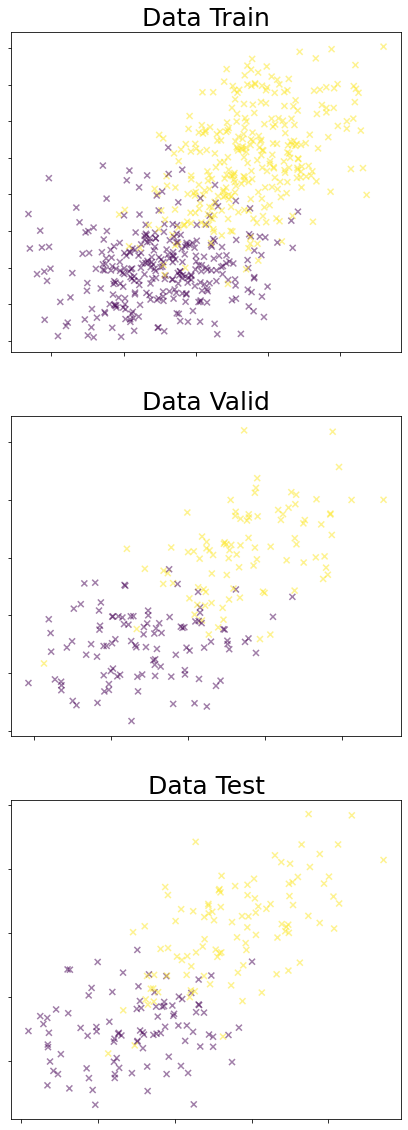

In [9]:
print('Viualización conjunto de Train y Test')
visualize_train_valid_test(X_train, X_valid, X_test, y_train, y_valid, y_test)

1.3 Entrene la red neuronal construida en el primer paso, variando el learning rate en cada entrenamiento. Se pide probar con las siguientes alternativas: [1, 0.1, 0.01, 0.001, 0.0001, 0.00001].
Por cada entrenamiento utilize al menos 300 épocas y muestre la curvas de aprendizaje para accuracy y loss. 
Las curvas deben ser construidas utilizando el conjunto de entrenamiento y de validación.

¿Cuál es la mejor alternativa de learning rate para el problema propuesto? ¿Por qué? 

(7 pts.)

In [10]:
#ordenar dimensiones para que coinciden con codigo creado 
#(train = data, feature)   despues a un suffle y a un get batch donde se dimensiona de forma correcta para la red neuronal
#(valid = feature, data) -> formato de ingreso a la red neuronal
X_train_mlp = X_train.copy()
y_train_mlp = y_train.reshape(y_train.shape[0], 1).copy()
X_valid_mlp = X_valid.T.copy()
y_valid_mlp = y_valid.reshape(y_valid.shape[0], 1).T.copy()

print('Train size X', X_train_mlp.shape)
print('Train size y', y_train_mlp.shape)

print('\nValid size X', X_valid_mlp.shape)
print('Valid size y', y_valid_mlp.shape)

Train size X (600, 2)
Train size y (600, 1)

Valid size X (2, 200)
Valid size y (1, 200)


In [17]:
print('Create Fully Connected Neural Network')
model = model_nn()
model.add_layer(8, 2, activation_function = expit, derivate_act_function = d_sigmoid) #crear capa con 8 neuronas y la anterior(inicial) tiene 2 features
model.add_layer(1, activation_function = expit, derivate_act_function = d_sigmoid)  #crear capa con 1 neurona
model.add_loss(loss_binary_crossentropy, derv_loss_binary_crossentropy)  #crear loss
model.save_initial_weights()   #guardar los pesos iniciales para hacer la comparativa de lr utilizando los mismos pesos

print('\nWeights')
print('Weights First Layer', model.W[1].shape)
print('Weights Second Layer', model.W[2].shape)
print('\nActivation function', model.f_act)
print('Derivate activation function', model.d_f_act)
print('Loss:', model.loss, 'Derivate_loss:', model.d_loss)

Create Fully Connected Neural Network

Weights
Weights First Layer (8, 2)
Weights Second Layer (1, 8)

Activation function [None, <ufunc 'expit'>, <ufunc 'expit'>]
Derivate activation function [None, <function d_sigmoid at 0x7fa859074620>, <function d_sigmoid at 0x7fa859074620>]
Loss: <function loss_binary_crossentropy at 0x7fa859074f28> Derivate_loss: <function derv_loss_binary_crossentropy at 0x7fa859074ea0>


In [0]:
#Parameters to train
epoch = 300
size_batch = 30  #número de observaciones en cada batch
num_batches = int(X_train_mlp.shape[0] / size_batch)       #cantidad de batches, mejor un numero exacto para evitar no pasar algunos datos

In [19]:
print('Entrenando la red neuronal con diferentes lr utilizando la misma configuración inicial aleatoria de los pesos')

Entrenando la red neuronal con diferentes lr utilizando la misma configuración inicial aleatoria de los pesos


lr = 1


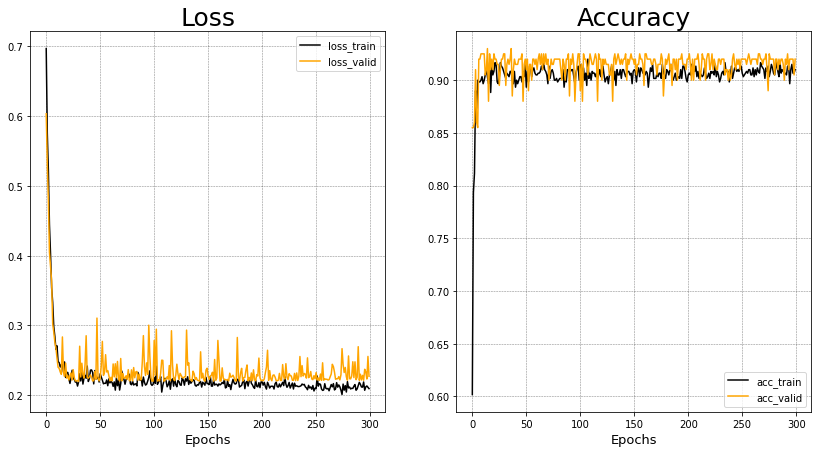

In [28]:
print('lr = 1')
loss_train, acc_train, loss_valid, acc_valid = model.train_nn(X_train_mlp, y_train_mlp, X_valid_mlp, y_valid_mlp, num_batches, size_batch, 1)
visualize_results(loss_train, loss_valid, acc_train, acc_valid)

lr = 0.1


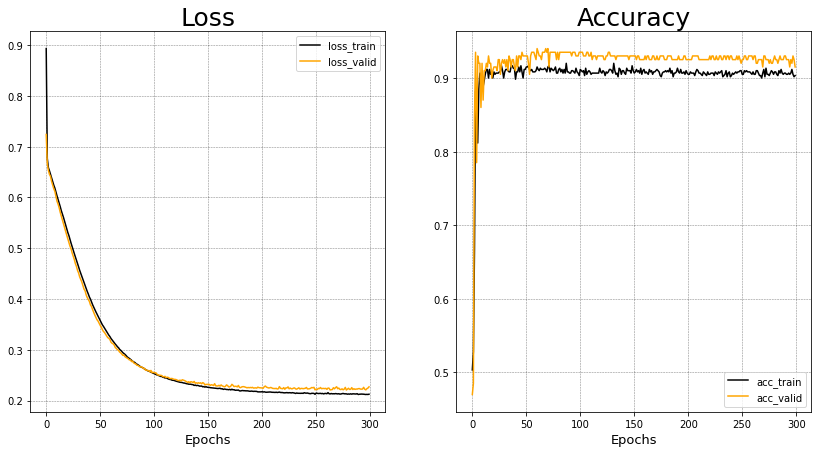

In [29]:
print('lr = 0.1')
model.reset_weights_to_initial()
loss_train, acc_train, loss_valid, acc_valid = model.train_nn(X_train_mlp, y_train_mlp, X_valid_mlp, y_valid_mlp, num_batches, size_batch, 0.1)
visualize_results(loss_train, loss_valid, acc_train, acc_valid)

lr = 0.01


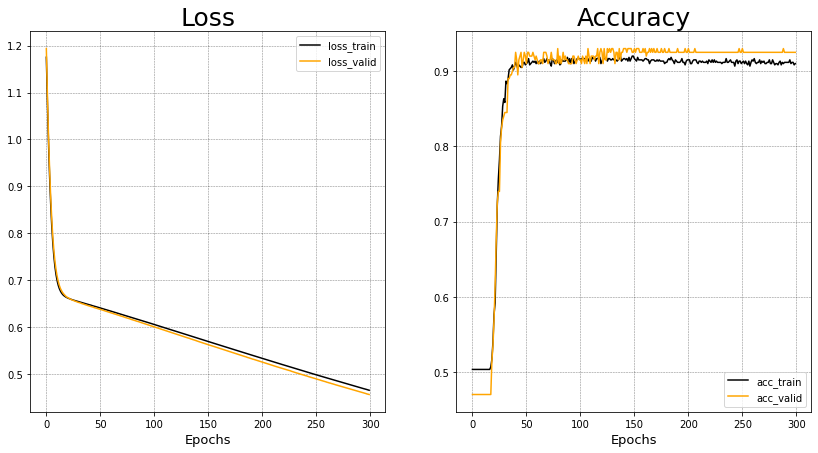

In [30]:
print('lr = 0.01')
model.reset_weights_to_initial()
loss_train, acc_train, loss_valid, acc_valid = model.train_nn(X_train_mlp, y_train_mlp, X_valid_mlp, y_valid_mlp, num_batches, size_batch, 0.01)
visualize_results(loss_train, loss_valid, acc_train, acc_valid)

lr = 0.001


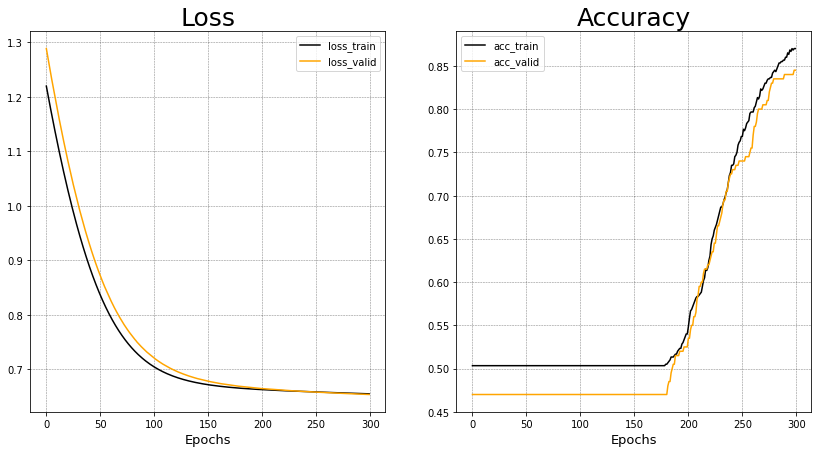

In [31]:
print('lr = 0.001')
model.reset_weights_to_initial()
loss_train, acc_train, loss_valid, acc_valid = model.train_nn(X_train_mlp, y_train_mlp, X_valid_mlp, y_valid_mlp, num_batches, size_batch, 0.001)
visualize_results(loss_train, loss_valid, acc_train, acc_valid)

lr = 0.0001


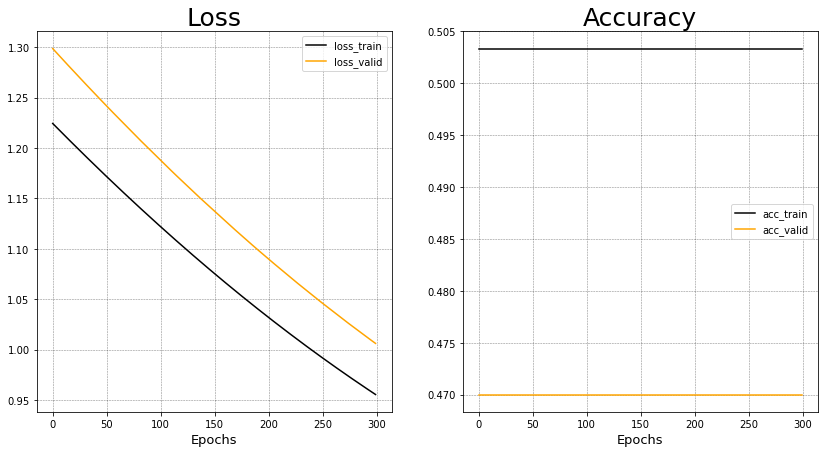

In [32]:
print('lr = 0.0001')
model.reset_weights_to_initial()
loss_train, acc_train, loss_valid, acc_valid = model.train_nn(X_train_mlp, y_train_mlp, X_valid_mlp, y_valid_mlp, num_batches, size_batch, 0.0001)
visualize_results(loss_train, loss_valid, acc_train, acc_valid)

lr = 0.00001


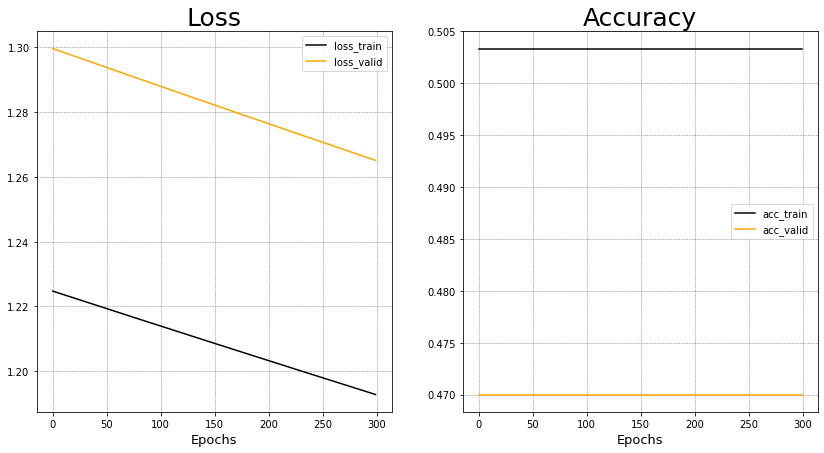

In [33]:
print('lr = 0.00001')
model.reset_weights_to_initial()
loss_train, acc_train, loss_valid, acc_valid = model.train_nn(X_train_mlp, y_train_mlp, X_valid_mlp, y_valid_mlp, num_batches, size_batch, 0.00001)
visualize_results(loss_train, loss_valid, acc_train, acc_valid)

**Respuesta:** La mejor alternativa de Learning rate a utilizar considerando el mismo conjunto inicial (aleatorio normal) de los pesos y bias (para poder comparar las diferentes redes neuronales con los mismos parámetros iniciales a excepción del LR y de los datos en el batch de entrenamiento), corresponde a una configuración de LR = 0.1 ó 0.01 ya que para ambos hiperparámetros se observan curvas de loss y accuracy muy similares, con un descenso más o menos suave de la curva de loss mostrando que explora una mayor parte de la curva no como con configuraciones, por ejemplo de LR = 1 la cual muestra un descenso brusco en las primeras épocas para posteriormente mostrar muchas fluctuaciones en la loss con respecto a un punto mínimo debido al alto learning rate, mientras que un LR = 0.001 y 0.00001 es muy pequeño y no logra hacer un descenso suficientemente rápido de la curva de loss.

Por otro lado, con el LR de 0.1 ó 0.01, las curvas para train y valid (tanto de loss como de accuracy) son muy similares, esto indica que la red neuronal se ajusta bien tanto para los datos de entrenamiento como validación, lo cual se puede explicar al observar los gráficos de los diferentes conjuntos de train y valid (puntos x e y) y darse cuenta que ambos conjuntos son muy similares por lo cual una red que se ajusta bien a un conjunto de entrenamiento, producirá resultados muy similares con un conjunto de validación muy similar al primero de entrenamiento. Del mismo modo, al ser curvas muy similares no se observa un problema de overffiting ni de underfitting ya que se consiguen resultados muy buenos con una loss muy cercana a cero y un accuracy muy cercano a 1.

## Pregunta 2: Entendiendo las operaciones convolucionales

En este apartado vamos a investigar de manera gráfica cuál es el resultado de una operación de convolución, que corresponde a la capacidad de una red convolucional de generar representaciones a partir de una imágen.

<img src="images/cute_cat.jpeg" alt="drawing" width="400"/>

https://github.com/joseortegalabra/MLBI/blob/master/Tarea2/images/cute_cat.jpeg


In [0]:
#funciones usadas en pregunta 2
from skimage import io
from sklearn.preprocessing import MinMaxScaler
from scipy.ndimage.filters import convolve

def visualize_conv_filter(original, convolution, left_name, right_name):
  fig, axs = plt.subplots(1,2, figsize = ((14,14)))
  axs[0].imshow(original)
  axs[0].set_title(left_name)

  axs[1].imshow(convolution)
  axs[1].set_title(right_name)

2.1 Cargue a imagen anterior como una matriz NumPy. Luego normalice la imagen de tal forma que sus valores estén dentro del rango [-0.5, 0.5]

(3 pts.)

In [59]:
cute_cat_path = 'https://raw.githubusercontent.com/joseortegalabra/MLBI/master/Tarea2/images/cute_cat.jpeg'
print('CUTE_CAT NUMPY MATRIX\n')
cute_cat = io.imread(cute_cat_path) /255.0 # imread lee las imagenes con los pixeles codificados como enteros 
cute_cat

CUTE_CAT NUMPY MATRIX



array([[[0.82352941, 0.80784314, 0.79607843],
        [0.83529412, 0.81960784, 0.80784314],
        [0.85098039, 0.83529412, 0.82352941],
        ...,
        [0.80784314, 0.78823529, 0.77254902],
        [0.80392157, 0.78431373, 0.76862745],
        [0.80392157, 0.78431373, 0.76862745]],

       [[0.83529412, 0.81960784, 0.80784314],
        [0.84313725, 0.82745098, 0.81568627],
        [0.85098039, 0.83529412, 0.82352941],
        ...,
        [0.79607843, 0.77647059, 0.76078431],
        [0.79215686, 0.77254902, 0.75686275],
        [0.79215686, 0.77254902, 0.75686275]],

       [[0.85490196, 0.83921569, 0.82745098],
        [0.85490196, 0.83921569, 0.82745098],
        [0.85490196, 0.83921569, 0.82745098],
        ...,
        [0.78823529, 0.76862745, 0.75294118],
        [0.78431373, 0.76470588, 0.74901961],
        [0.78039216, 0.76078431, 0.74509804]],

       ...,

       [[0.81176471, 0.72941176, 0.65490196],
        [0.81176471, 0.72941176, 0.65490196],
        [0.80392157, 0

In [60]:
h =  cute_cat.shape[0]  #Alto
w =   cute_cat.shape[1]  #Ancho
c =    cute_cat.shape[2]  #canal
print('Alto Pixeles', h)  
print('Ancho Pixeles', w)  
print('Canales', c)  

Alto Pixeles 463
Ancho Pixeles 564
Canales 3


VISUALIZE ORIGINAL CUTE_CAT



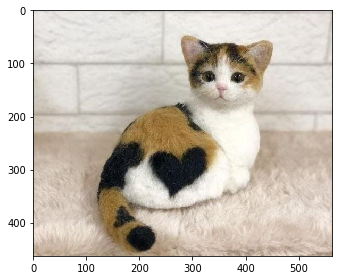

In [61]:
print('VISUALIZE ORIGINAL CUTE_CAT\n')
io.imshow(cute_cat)

In [62]:
scaler = MinMaxScaler()
cute_cat_scaled = scaler.fit_transform(cute_cat.reshape(h*w, c)) -0.5  # reshape the input so that each channel becomes one column - -0.5 to scale into -0.5,0.5
cute_cat_scaled = cute_cat_scaled.reshape(h,w,c)
print('CUTE_CAT NORMALIZED -0.5, 0.5\n\n', cute_cat_scaled)

CUTE_CAT NORMALIZED -0.5, 0.5

 [[[ 0.32352941  0.30784314  0.30876494]
  [ 0.33529412  0.31960784  0.32071713]
  [ 0.35098039  0.33529412  0.33665339]
  ...
  [ 0.30784314  0.28823529  0.28486056]
  [ 0.30392157  0.28431373  0.28087649]
  [ 0.30392157  0.28431373  0.28087649]]

 [[ 0.33529412  0.31960784  0.32071713]
  [ 0.34313725  0.32745098  0.32868526]
  [ 0.35098039  0.33529412  0.33665339]
  ...
  [ 0.29607843  0.27647059  0.27290837]
  [ 0.29215686  0.27254902  0.2689243 ]
  [ 0.29215686  0.27254902  0.2689243 ]]

 [[ 0.35490196  0.33921569  0.34063745]
  [ 0.35490196  0.33921569  0.34063745]
  [ 0.35490196  0.33921569  0.34063745]
  ...
  [ 0.28823529  0.26862745  0.26494024]
  [ 0.28431373  0.26470588  0.26095618]
  [ 0.28039216  0.26078431  0.25697211]]

 ...

 [[ 0.31176471  0.22941176  0.16533865]
  [ 0.31176471  0.22941176  0.16533865]
  [ 0.30392157  0.22156863  0.15737052]
  ...
  [ 0.15098039  0.06862745 -0.0059761 ]
  [ 0.1627451   0.08039216  0.0059761 ]
  [ 0.162745

In [63]:
print('Revisión Imagen Normalizada')
print('Mínimo Valor de la imagen cute_cat_normalizada: ', np.min(cute_cat_scaled))
print('Posición del mínimo valor en la matriz flattened cute_cat_normalizada: ' ,np.argmin(cute_cat_scaled) )
print('Valor en esa posición:', cute_cat_scaled.reshape(w*h*c)[np.argmin(cute_cat_scaled)])

Revisión Imagen Normalizada
Mínimo Valor de la imagen cute_cat_normalizada:  -0.5
Posición del mínimo valor en la matriz flattened cute_cat_normalizada:  126386
Valor en esa posición: -0.5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Visualize Scaler -0.5, 0.5 cute_cat


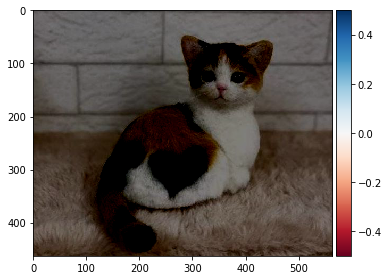

In [64]:
print('Visualize Scaler -0.5, 0.5 cute_cat')
io.imshow(cute_cat_scaled)

2.2 Elija dos kernel de tamaño 3x3 (ej. border detection, sharpen, box blur kernels, etc. Estos los puede encontrar [acá](https://en.wikipedia.org/wiki/Kernel_(image_processing))) y convolucione la imagen con cada uno de ellos. Para esto puede ocupar su propia función de convolución o utilzar la función [scipy.ndimage.filters.convolve](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.convolve.html), utiizando borde constante.

(6 pts.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



EDGE DETECTION



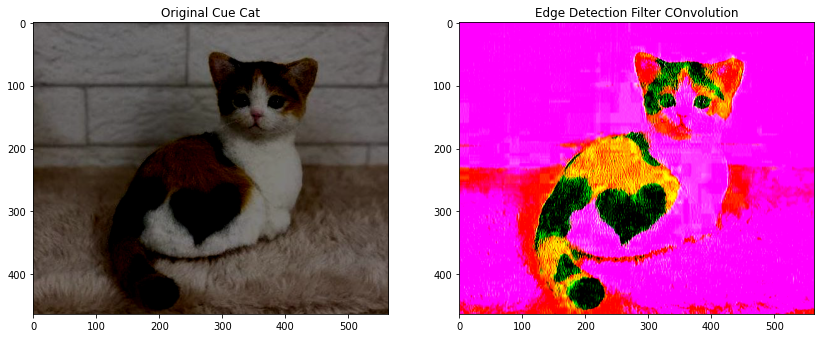

In [65]:
print('\nEDGE DETECTION\n')
#filters 2d
edge_detection = np.array([
                           [-1, -1, -1],
                           [-1, 8 , -1],
                           [-1, -1, -1]
])
#filter 3d
filter_edge_detection = np.array([edge_detection,edge_detection,edge_detection])
#image convolution
conv_edge_detection = convolve(cute_cat_scaled, filter_edge_detection, mode = 'constant', cval = 0.0)
#show convolution
visualize_conv_filter(cute_cat_scaled, conv_edge_detection, 'Original Cue Cat', 'Edge Detection Filter COnvolution')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



SHARPEN DETECTION



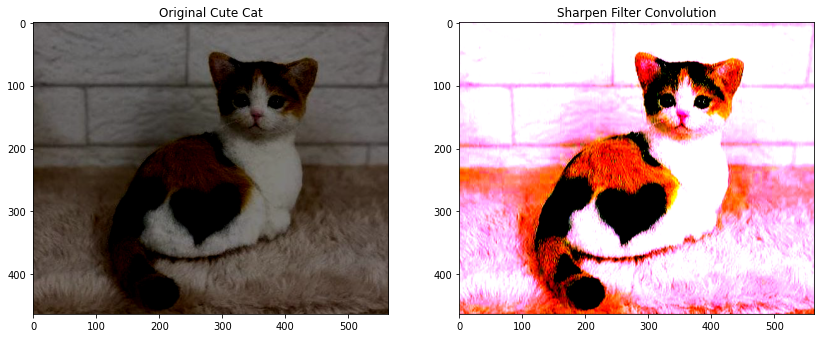

In [66]:
print('\nSHARPEN DETECTION\n')
#filters 2d
sharpen = np.array([
                           [0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]
])
#filter 3d
filter_sharpen = np.array([sharpen,sharpen,sharpen])
#image convolution
conv_sharpen = convolve(cute_cat_scaled, filter_sharpen, mode = 'constant', cval = 0.0)
#show convolution
visualize_conv_filter(cute_cat_scaled, conv_sharpen, 'Original Cute Cat', 'Sharpen Filter Convolution')

2.3 Una vez convolucionada la imagen, convierta a cero los valores menores a cero. Para esto puede usar la función [np.clip](https://numpy.org/doc/1.18/reference/generated/numpy.clip.html). En otras palabras:
```
if x < 0:
    x = 0
else:
    x = x

```
(2 pts)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Relu Edge Detection


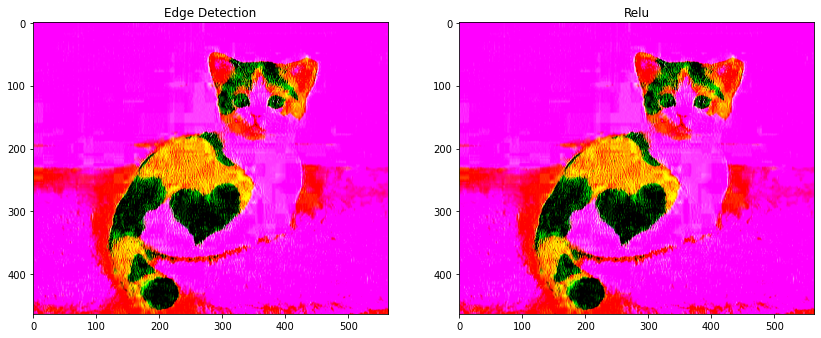

In [68]:
print('Relu Edge Detection')
relu_edge_detection = np.clip(conv_edge_detection, 0, 100)
visualize_conv_filter(conv_edge_detection, relu_edge_detection, 'Edge Detection', 'Relu')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Relu Sharpen


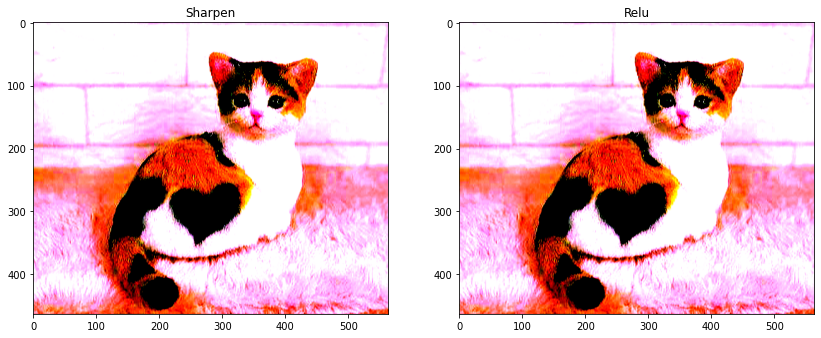

In [69]:
print('Relu Sharpen')
relu_sharpen = np.clip(conv_sharpen, 0, 100)
visualize_conv_filter(conv_sharpen, relu_sharpen, 'Sharpen', 'Relu')

In [70]:
print('Revisión Relu in Sharpen filter')
print('Cantidad de elementos en el filtro', conv_sharpen.size)
print('Cantidad de ceros en el filtro antes de relu', conv_sharpen[conv_sharpen<0].size)
print('Cantidad de ceros despues de relu', relu_sharpen[relu_sharpen<0])

Revisión Relu in Sharpen filter
Cantidad de elementos en el filtro 783396
Cantidad de ceros en el filtro antes de relu 98580
Cantidad de ceros despues de relu []


2.4 Implemente por su cuenta la operación de agregación estadística Max-Pooling. Para esto utilice kernel_size=4 y stride=4.

(6 pts.)

In [0]:
def pooling_(img, i, j, k, stride, filter_size):
  max_ = 0 
  for m in range(filter_size):  #moverme en altura
    for n in range(filter_size): #moverme en el ancho
      if(img[i*stride + m][j*stride + n][k] >= max_):
        max_ = img[i*stride + m][j*stride + n][k]
  return max_

def max_pooling(img, height, weight, channel, filter_size, stride):
  '''
  Al aplicar los filtros de convolusion se obtiene una imagen de 3 canales, y no de 1 solo como una correcta convolusión en una CNN
  Se aplica capa de pooling a cada uno de los canales reduciendo unicamente ancho y alto sin afecta la profunidad, como seria en una CNN
  '''
  pooling_size_height = math.floor(((height - filter_size)/stride)+1)
  pooling_size_weight = math.floor(((weight- filter_size)/stride)+1)
  print('Nuevas Dimensiones tras pooling')
  print('Alto Pixeles', pooling_size_height,  'Ancho Pixeles', pooling_size_weight, 'Canales', channel, '\n')
  output_pooling = np.zeros((pooling_size_height, pooling_size_weight, channel))
  for k in range(channel):
    for i in range(pooling_size_height):
      for j in range(pooling_size_weight):
        output_pooling[i][j][k] = pooling_(img, i, j, k, stride, filter_size) 
  return output_pooling

Nuevas Dimensiones tras pooling
Alto Pixeles 115 Ancho Pixeles 141 Canales 3 



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


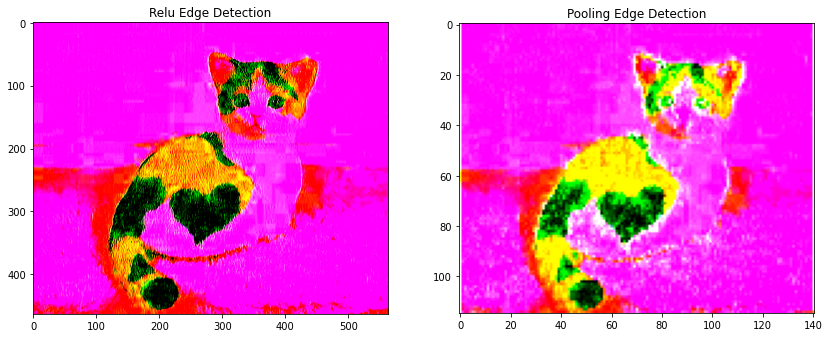

In [72]:
pooling_edge_detection = max_pooling(relu_edge_detection, h, w, c, 4, 4)   #filtros pasados NO disminuyen las dimensiones de las imagenes
visualize_conv_filter(relu_edge_detection, pooling_edge_detection, 'Relu Edge Detection', 'Pooling Edge Detection')

Nuevas Dimensiones tras pooling
Alto Pixeles 115 Ancho Pixeles 141 Canales 3 



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


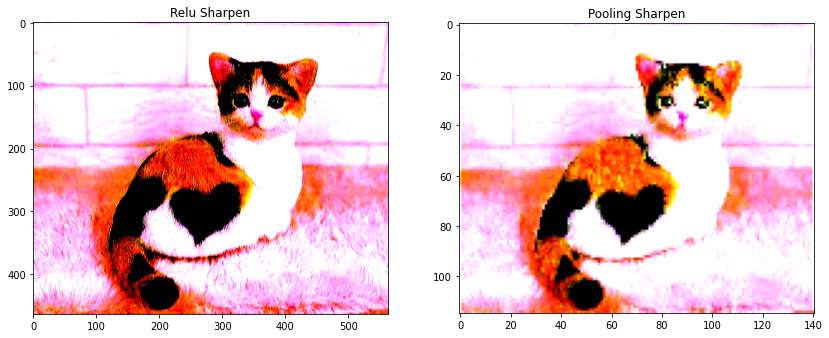

In [73]:
pooling_sharpen = max_pooling(relu_sharpen, h, w, c, 4, 4)   #filtros pasados NO disminuyen las dimensiones de las imagenes
visualize_conv_filter(relu_sharpen, pooling_sharpen, 'Relu Sharpen', 'Pooling Sharpen')

2.5 Muestre los resultados de las operaciones realizadas. ¿Qué puede decir acerca de ellos? ¿Cómo cree que estas operaciones pueden ser de utilidad para una red neuronal a la hora de realizar una tarea de clasificación?

(3 pts.)

**Respuesta:** Se puede observar que los filtros cumplen con el objetivo detectando ya sea las características más notorias o los bordes de la imagen al aplicar un filtro de covolusión para luego aplicar una función relu (aplicar una función de transformación no lineal y permitir que la red neuronal pueda aprender relaciones no lineales) y posteriormente aplicar una capa de max pooling para extraer las características que más destacan de la imagen ademas de reducir las dimensiones de la imagen y por lo tanto reducir la cantidad de parámetros de la red neuronal.

Las diferentes operaciones son de utilidad para una red neuronal porque permiten extraer las caraterísticas más importantes de la imagen y por lo tanto con estas características principales se puede diferenciar una imagen de otra y así permitir clasificar.

# Pregunta 3: Construyendo una Red Convolucional

The Street View House Numbers ([SVHN](http://ufldl.stanford.edu/housenumbers/)) [1] es un conocido dataset, comunmente utilizado como benchmark para probar y comparar modelos de Machine Learning. Este dataset contiene imágenes de números de casa vistos desde la calle, los cuales se encuentran etiquetados y dicha etiqueta se asocia al dígito que se encuentra al centro de la imagen.

<img src="images/svhn.png" alt="drawing" width="400"/>

https://github.com/joseortegalabra/MLBI/blob/master/Tarea2/images/svhn.png

Los datos se encuentran públicamente disponibles a continuación:
1. [train set](http://ufldl.stanford.edu/housenumbers/train_32x32.mat)
2. [test set](http://ufldl.stanford.edu/housenumbers/test_32x32.mat)


[1] Netzer, Y., Wang, T., Coates, A., Bissacco, A., Wu, B., Y Ng, A.: Reading Digits in Natural Images with Unsupervised Feature Learning. NIPS (2011)

3.1 Cargue las imagenes y etiquetas del set de entrenamiento y test como matrices NumPy. Las etiquetas van del número del '1' al '10', donde la décima etiqueta se asocia al valor 0. Cambie el valor de la etiqueta '10', para que cada etiqueta quede asociada al dígito que representa. Finalmente, grafique 9 imágenes del conjunto de entrenamiento.

(3 pts.)

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import scipy.io

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#data train
train_32x32 = drive.CreateFile({'id':"182W2-lNNJ4loIArl5WeUHH3jlMgvVy3g"}) 
train_32x32.GetContentFile('train_32x32.mat') 

#data test
test_32x32 = drive.CreateFile({'id':"1RYtOpjb9W-WgCZTdJkhBkwbs0K-TGwFr"})   # replace the id with id of file you want to access
test_32x32.GetContentFile('test_32x32.mat')        # replace the file name with your file

In [0]:
set_train = scipy.io.loadmat('train_32x32.mat')
set_test = scipy.io.loadmat('test_32x32.mat')

In [0]:
X_train_valid = set_train['X']/255  #scale img 0 to 1
y_train_valid = set_train['y']

X_test = set_test['X']/255 #normalizar la imagen de 0 a 1, min max scaler
y_test = set_test['y']

print('Tamaño X_train_valid', X_train_valid.shape)
print('Tamaño y_train_valid', y_train_valid.shape)
print('Tamaño X_test', X_test.shape)
print('Tamaño y_test', y_test.shape)

Tamaño X_train_valid (32, 32, 3, 73257)
Tamaño y_train_valid (73257, 1)
Tamaño X_test (32, 32, 3, 26032)
Tamaño y_test (26032, 1)


###### para poder procesar en keras debe de tener de ser un tensor del formato (n° imagenes, height, weight, channels)

In [0]:
def transform_to_tensor_keras(x):
  x_transform = []
  for i in range(x.shape[3]):
    x_transform.append(x[:, :, :, i])
  x_transform = np.array(x_transform)
  return x_transform

In [0]:
X_train_valid = transform_to_tensor_keras(X_train_valid)
X_test = transform_to_tensor_keras(X_test)

print('Tamaño X_train_valid', X_train_valid.shape)
print('Tamaño y_train_valid', y_train_valid.shape)
print('Tamaño X_test', X_test.shape)
print('Tamaño y_test', y_test.shape)

Tamaño X_train_valid (73257, 32, 32, 3)
Tamaño y_train_valid (73257, 1)
Tamaño X_test (26032, 32, 32, 3)
Tamaño y_test (26032, 1)


In [0]:
#transformar 10 a cero
y_train_valid = np.where(y_train_valid < 10, y_train_valid, 0)
y_test = np.where(y_test < 10, y_test, 0)

In [0]:
#graficar 9 imagenes conjunto de entrenamiento
def visualize_9_images(x, y, index):
  fig, axs = plt.subplots(3, 3, figsize = ((14,14)))
  for i in range(index.shape[0]):
    for j in range(index.shape[1]):
      axs[i][j].imshow(x[ index[i][j],:, :, :])
      axs[i][j].set_title(y[ index[i][j] ])
      axs[i][j].axis('off')
      

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


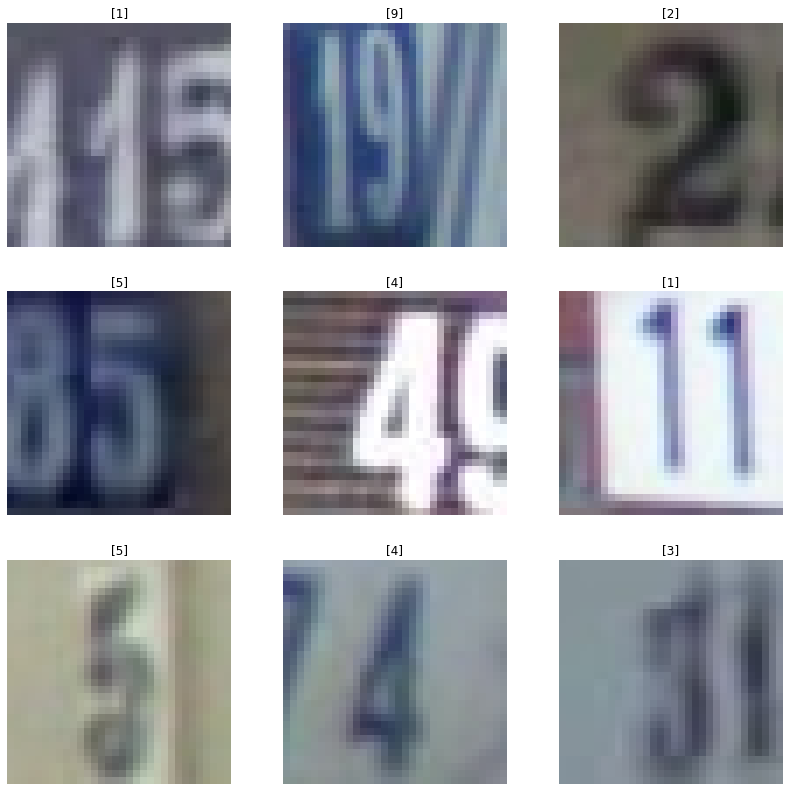

In [0]:
random_index = np.random.randint(low=0, high=X_train_valid.shape[0], size=(3,3))
visualize_9_images(X_train_valid,y_train_valid , random_index)

3.2 Para terminar el preprocesamiento de los datos, se pide que las etiquetas se presenten como variables categóricas. Esto es, para la etiqueta: 
```
0 = [1, 0, ... , 0]
1 = [0, 1, ... , 0]
...
N = [0, 0, ... , 1]
```
Además, se pide seleccionar un conjunto de validación para poder monitorear el sobreajuste del modelo sobre los datos de entrenamiento. Se pide que un 20% de los datos de entrenamiento sean utilizados para validación.

(3 pts.)

In [0]:
#obtener conjunto de train y valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.2, random_state = 1)
X_train = X_train
X_valid = X_valid

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


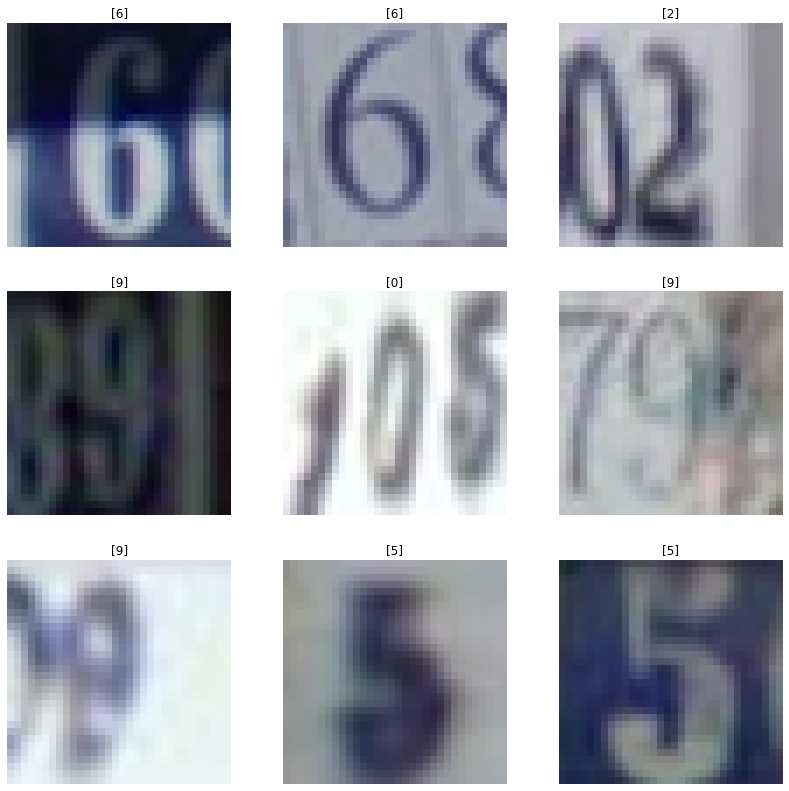

In [0]:
#visualización del conjunto de TRAIN
visualize_9_images(X_train,y_train , np.random.randint(low=0, high=X_train.shape[0], size=(3,3)))

In [0]:
import pandas as pd
y_train = np.array(pd.get_dummies(y_train.reshape(y_train.shape[0])))
y_valid = np.array(pd.get_dummies(y_valid.reshape(y_valid.shape[0])))
y_test  = np.array(pd.get_dummies(y_test.reshape(y_test.shape[0])))

In [0]:
#DIMENSIONES DE LOS DIFENTES CONJUNTOS DE TRAIN, VALID Y TEST
print('Train size X', X_train.shape)
print('Train size y', y_train.shape)

print('\nValid size X', X_valid.shape)
print('Valid size y', y_valid.shape)

print('\nTest size X', X_test.shape)
print('Test size y', y_test.shape)

Train size X (58605, 32, 32, 3)
Train size y (58605, 10)

Valid size X (14652, 32, 32, 3)
Valid size y (14652, 10)

Test size X (26032, 32, 32, 3)
Test size y (26032, 10)


In [0]:
#EJEMPLO DE 10 primeras observaciones de Y en el conjunto de TEST
y_test[:10, :]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=uint8)

3.3 Para construir red convolucional, se utilizará una modificación la famosa arquitectura arquitectura AlexNet, propuesta por Alex Krizhevsky [2] [(lectura obligatoria)](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf).

Se pide especificamente construir una red convoucional con la siguiente arquitectura:

| Layer  | Operation|  Kernel |  Stride |  Activation | Maxpooling (stride) | Dropout (prob) |
|---|---|---|---|---|---|---|
|  1 | Convolución (32)  |  (3,3) |  1 |  ReLU |  No | No |
|  2 |  Convolución (32) | (3,3)  |  1 | ReLU  |  Yes (2,2) | No |
|  3 |  Convolución (64) | (3,3)  |  1 | ReLU  |  No | No |
|  4 |  Convolución (64) | (3,3)  |  1 | ReLU  |  Yes (2,2) | Yes(0.25) |
|  5 |  Densa (512) | -  | - | ReLU  | No | Yes(0.5) |
|  5 |  Densa (10) | -  | - | Softmax  | No | No |


Calcule el número de parámetros a dicha arquitectura.

[2] Krizhevsky, A., Sutskever, I., Hinton, G.: ImageNet Classification with Deep Convolutional Neural Networks. NIPS (2012)

(8 pts.)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [0]:
modelCNN = Sequential()
#first Covolutional layer   padding valid = no padding, padding same = zero pdding
modelCNN.add(Conv2D(input_shape = (32, 32, 3), filters = 32, kernel_size =(3,3), strides = 1 , padding = 'valid' , activation = 'relu' , data_format = 'channels_last'))

#second Convolutional layer
modelCNN.add(Conv2D( filters = 32, kernel_size = (3,3), strides = 1 , padding = 'valid', activation = 'relu', data_format = 'channels_last'  ))
modelCNN.add(MaxPooling2D( pool_size = (2,2),  strides = 1 , padding = 'valid', data_format= 'channels_last'))

#third Convolutional layer
modelCNN.add(Conv2D( filters = 64, kernel_size = (3,3), strides = 1,  padding = 'valid', activation = 'relu', data_format = 'channels_last' ))

#fourth Convolutional layer
modelCNN.add(Conv2D( filters = 64, kernel_size = (3,3), strides = 1, padding = 'valid', activation = 'relu' ))
modelCNN.add(Dropout(0.25))   #dropout antes del maxpooling
modelCNN.add(MaxPooling2D( pool_size = (2,2) , strides = 1, padding = 'valid', data_format = 'channels_last' ))

#flatten layer
modelCNN.add(Flatten())

#Firts fully connected
modelCNN.add(Dense(512, activation = 'relu'))
modelCNN.add(Dropout(0.5))

#Second fully connected
modelCNN.add(Dense(10, activation = 'softmax'))

In [0]:
modelCNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)       

3.4 Entrene esta red neuronal utilizando la función de costos correspondiente y las siguientes consideraciones:

1. Optimizador Adam (lr=0.0001)
2. batch size = 64 
3. Número de epocas = 10

**OBS: debe tener en cuenta que el proceso de entrenamiento CPU puede demorar algunas horas. Si dispone de GPU (o utiliza coblab), puede acelerar este proceso y demorarse incluso minutos**

(3 pts.)

In [0]:
#parameters
lr = 0.0001
num_epochs = 10
batch = 64

In [0]:
#usar cuda
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [0]:
opt = kr.optimizers.Adam(learning_rate=lr)
modelCNN.compile(
    loss = 'categorical_crossentropy',
    optimizer = opt,
    metrics = ['accuracy']
)

history_CNN = modelCNN.fit(
    X_train,
    y_train, 
    batch_size = batch,
    verbose = 1,
    epochs = num_epochs,
    validation_data = (X_valid, y_valid)
)

Train on 58605 samples, validate on 14652 samples
Epoch 1/10
58605/58605 [==============================] - 17s 288us/step - loss: 1.0587 - accuracy: 0.6671 - val_loss: 0.6350 - val_accuracy: 0.8421
Epoch 2/10
58605/58605 [==============================] - 14s 247us/step - loss: 0.5557 - accuracy: 0.8352 - val_loss: 0.5181 - val_accuracy: 0.8649
Epoch 3/10
58605/58605 [==============================] - 15s 250us/step - loss: 0.4596 - accuracy: 0.8623 - val_loss: 0.4375 - val_accuracy: 0.8784
Epoch 4/10
58605/58605 [==============================] - 15s 254us/step - loss: 0.4038 - accuracy: 0.8782 - val_loss: 0.3968 - val_accuracy: 0.8921
Epoch 5/10
58605/58605 [==============================] - 15s 253us/step - loss: 0.3640 - accuracy: 0.8909 - val_loss: 0.3912 - val_accuracy: 0.8977
Epoch 6/10
58605/58605 [==============================] - 15s 253us/step - loss: 0.3305 - accuracy: 0.9005 - val_loss: 0.3701 - val_accuracy: 0.8995
Epoch 7/10
58605/58605 [==============================] 

3.5 Grafique dos curvas de aprendizaje, donde en el eje x se muestre el número de épocas y en el eje y se muestre la función de pérdida / accuracy respectivamente. Este gráfico debe contener los valores para el conjunto de entrenamiento, validación y el resultado final medido sobre el conjunto de test.

(3 pts.)

In [0]:
score = modelCNN.evaluate(X_test, y_test, verbose=0)
loss_test_CNN_mean = score[0]
acc_test_CNN_mean = score[1]

In [0]:
def visualize_results_CNN(train_loss, val_loss, train_acc, val_acc, test_loss, test_acc):
  #visualize acc and loss for each epoch in train and validation. 
  #visualize acc and loss mean in test (mean value for each epoch)
  fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = ((14, 7)))
  ax = axs[0]
  ax.set_title('Loss', fontsize = 25)
  ax.grid(color = 'black', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
  ax.plot(train_loss, label = 'loss_train', color = 'black', linestyle = '-')
  ax.plot(val_loss, label = 'loss_valid', color = 'orange')
  ax.plot(np.full( len(train_loss),test_loss), label = 'Mean loss_test', color = 'green')
  ax.set_xlabel('Epochs', fontsize = 13)
  ax.legend()

  ax = axs[1]
  ax.set_title('Accuracy', fontsize = 25)
  ax.grid(color = 'black', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
  ax.plot(train_acc, label = 'acc_train', color = 'black', linestyle = '-')
  ax.plot(val_acc, label = 'acc_valid', color = 'orange')
  ax.plot(np.full(len(train_acc) ,test_acc), label = 'Mean acc_test', color = 'green')
  ax.set_xlabel('Epochs', fontsize = 13)
  plt.legend()

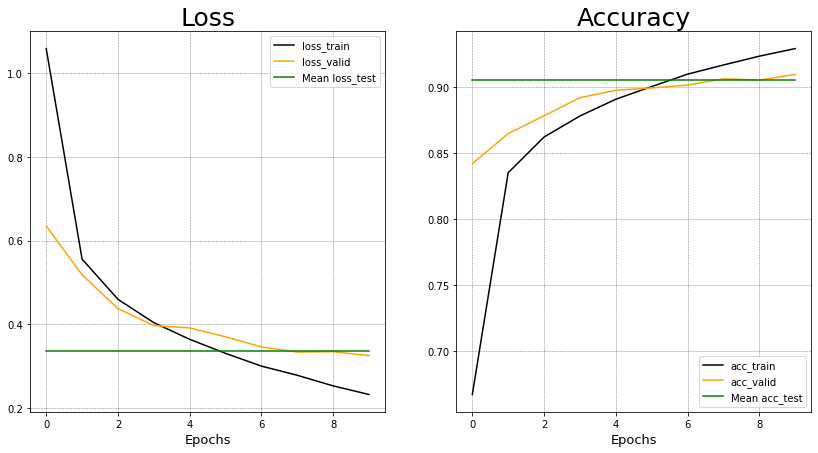

In [0]:
visualize_results_CNN(history_CNN.history['loss'], history_CNN.history['val_loss'], history_CNN.history['accuracy'], 
                      history_CNN.history['val_accuracy'], loss_test_CNN_mean, acc_test_CNN_mean)

**Respuesta:** Se puede observar que al entrenar la red neuronal en 10 épocas se observan resultados ideales que uno desearía obtener al entrenar una red neuronal, nose observa overfitting (al estar todas las curvas loss disminuyendo) ni underfitting (al tener loss muy baja y acc muy alto en todos los conjuntos de datos). Además la menor loss se da en el conjunto de entrenamiento que es lo deseable al entrenar la CNN con este conjunto de datos y obteniéndose loss un poco más altas con datos no visto como en el conjunto de validación y testeo con datos extraidos del "mundo real", como se dijo dichos resultados son los ideales que se desearía obtener en una NN a pesar de realizar muy pocas épocas (lo cual se arregla al tener muchos pasos del gradiente en cada época al tomar batch de datos muy pequeños en comparación al total de data disponible).

A continuación se muestra los resultados al entrenar la CNN en 90 épocas más para sumar un total de 100 épocas y se puede observar que los resultados empeoran considerablemente con un claro overfitting de la red al disminuir considerablemente, a casi cero, la loss en el conjunto de train y aumentando en el conjunto de validación, lo cual también se observa con un accuracy casi de 1 en train mientras que en valid este valor disminuye, ajustando la red sólo a dichos datos de entrenamiento por realizar un entrenamiento muy largo en muchas épocas.

### Entrenando en 100 épocas

In [0]:
history_CNN_100_epochs = modelCNN.fit(
    X_train,
    y_train, 
    batch_size = batch,
    verbose = 1,
    epochs = 90,
    validation_data = (X_valid, y_valid)
)

Train on 58605 samples, validate on 14652 samples
Epoch 1/90
58605/58605 [==============================] - 15s 251us/step - loss: 0.2117 - accuracy: 0.9356 - val_loss: 0.3193 - val_accuracy: 0.9106
Epoch 2/90
58605/58605 [==============================] - 15s 248us/step - loss: 0.1935 - accuracy: 0.9409 - val_loss: 0.3147 - val_accuracy: 0.9143
Epoch 3/90
58605/58605 [==============================] - 15s 250us/step - loss: 0.1770 - accuracy: 0.9459 - val_loss: 0.3243 - val_accuracy: 0.9100
Epoch 4/90
58605/58605 [==============================] - 15s 252us/step - loss: 0.1629 - accuracy: 0.9496 - val_loss: 0.3168 - val_accuracy: 0.9153
Epoch 5/90
58605/58605 [==============================] - 15s 252us/step - loss: 0.1454 - accuracy: 0.9542 - val_loss: 0.3191 - val_accuracy: 0.9154
Epoch 6/90
58605/58605 [==============================] - 15s 251us/step - loss: 0.1353 - accuracy: 0.9576 - val_loss: 0.3216 - val_accuracy: 0.9161
Epoch 7/90
58605/58605 [==============================] 

In [0]:
score_100_epochs = modelCNN.evaluate(X_test, y_test, verbose=0)
loss_test_CNN_mean_100_epochs = score[0]
acc_test_CNN_mean_100_epochs = score[1]

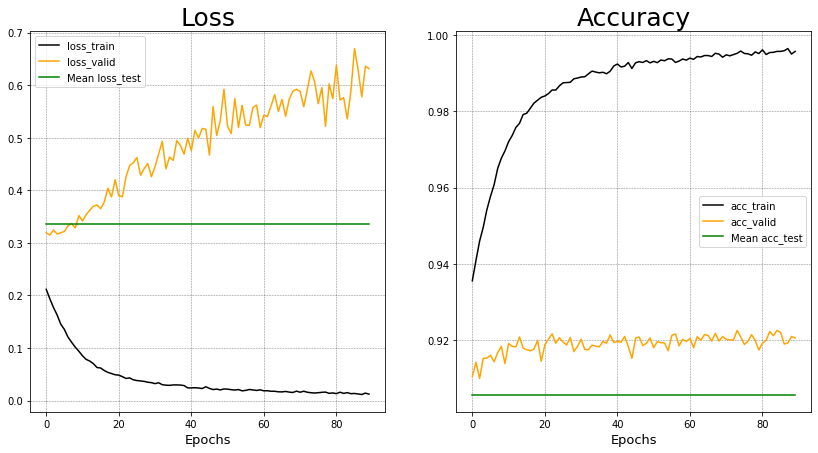

In [0]:
visualize_results_CNN(history_CNN_100_epochs.history['loss'], history_CNN_100_epochs.history['val_loss'], history_CNN_100_epochs.history['accuracy'], 
                      history_CNN_100_epochs.history['val_accuracy'], loss_test_CNN_mean_100_epochs, acc_test_CNN_mean_100_epochs)